# Credit Risk Analysis and Prediction

## Overview

This project focuses on Credit Risk Analysis and Prediction using customer transaction and demographic data. The dataset contains information on customer card payment history and demographic details, which are used to classify customers as either high risk or low risk for specific banking products. This project is ideal for budding data scientists and data analysts to experiment with machine learning and statistical modeling concepts.

## Source

This dataset is available on kaggle in the following link:

> https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset

## Data Dictionary

The project utilizes two main datasets:

### 1. `payment_data.csv`
This dataset contains customer card payment history. The features are:

- **id**: This is the unique ID for a customer. Numerical Data.
- **OVD_t1**: Number of times overdue type 1 for a customer.  Numerical Data.
- **OVD_t2**: Number of times overdue type 2 for a customer.  Numerical Data.
- **OVD_t3**: Number of times overdue type 3 for a customer.  Numerical Data.
- **OVD_sum**: Total overdue days for a customer.  Numerical Data.
- **pay_normal**: Number of times normal payment was made by the customer. Numerical Data.
- **prod_code**: Credit product code. Numerical Data.
- **prod_limit**: Credit limit of the product. Numerical Data.
- **update_date**: Account update date of a customer. Date Data.
- **new_balance**: Current balance of the product of a customer. Numerical Data.
- **highest_balance**: Highest balance in history of a customer. Numerical Data.
- **report_date**: Date of the recent payment of a customer. Date Data.

### 2. `customer_data.csv`
This dataset contains customer demographic data and category attributes, which have been encoded. The features include:

- **Category features**: `fea_1`, `fea_3`, `fea_5`, `fea_6`, `fea_7`, `fea_9`
- **Numerical features**: `fea_2`, `fea_4`, `fea_8`, `fea_10`, `fea_11`
- **label**: This is the output feature indicating credit risk of a customer. It is a **binary** class and contains the following values: 
  - `1`: High credit risk customer
  - `0`: Low credit risk customer

## Problem Statements

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the data, merge two datasets, and uncover the patterns and relationships among the features that influence the prediction of risk in credit.
2. **Data Cleaning**: Clean the data by removing or handling the missing values, outliers, duplicate rows and unnecessary features.

### Load Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.ensemble import IsolationForest
import ppscore as pps
from sklearn.impute import KNNImputer

### Settings

In [2]:
# Warning
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Data Path
data_path = "../data"
cust_csv_path = os.path.join(data_path, "customer_data.csv")
pay_csv_path = os.path.join(data_path, "payment_data.csv")

### Load Data

In [3]:
# Load Customer data
cust_df = pd.read_csv(cust_csv_path)

In [4]:
# Load Payment data
pay_df = pd.read_csv(pay_csv_path)

### General Information

In [5]:
# Show 1st 5 rows to get an idea about the data in each feature of customer
cust_df.head()

label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      0  59004779      4  1277.0      1  113000.0      2      8     -1   
2      0  58990862      7  1298.0      1  110000.0      2     11     -1   
3      1  58995168      7  1335.5      1  151000.0      2     11      5   
4      0  54987320      7     NaN      2   59000.0      2     11      5   

   fea_8  fea_9  fea_10      fea_11  
0    109      5  151300  244.948974  
1    100      3  341759  207.173840  
2    101      5   72001    1.000000  
3    110      3   60084    1.000000  
4    108      4  450081  197.403141

In [6]:
# Show 1st 5 rows to get an idea about the data in each feature of payment
pay_df.head()

id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
0  58987402       0       0       0        0           1         10   
1  58995151       0       0       0        0           1          5   
2  58997200       0       0       0        0           2          5   
3  54988608       0       0       0        0           3         10   
4  54987763       0       0       0        0           2         10   

   prod_limit update_date  new_balance  highest_balance report_date  
0     16500.0  04/12/2016          0.0              NaN         NaN  
1         NaN  04/12/2016     588720.0         491100.0         NaN  
2         NaN  04/12/2016     840000.0         700500.0  22/04/2016  
3     37400.0  03/12/2016       8425.2           7520.0  25/04/2016  
4         NaN  03/12/2016      15147.6              NaN  26/04/2016

In [8]:
# Merge customer and payment  data frames on the common feature customer ID (id)
df = pay_df.merge(cust_df, on= "id")

In [9]:
# Sanity Check
df.head()

id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
0  58987402       0       0       0        0           1         10   
1  58995151       0       0       0        0           1          5   
2  58997200       0       0       0        0           2          5   
3  54988608       0       0       0        0           3         10   
4  54987763       0       0       0        0           2         10   

   prod_limit update_date  new_balance  ...   fea_2 fea_3     fea_4  fea_5  \
0     16500.0  04/12/2016          0.0  ...  1241.0     3   62000.0      2   
1         NaN  04/12/2016     588720.0  ...     NaN     2  126000.0      2   
2         NaN  04/12/2016     840000.0  ...  1376.0     1  150000.0      2   
3     37400.0  03/12/2016       8425.2  ...  1214.0     3   60000.0      2   
4         NaN  03/12/2016      15147.6  ...  1232.0     1   96000.0      2   

   fea_6  fea_7  fea_8  fea_9  fea_10      fea_11  
0     15      9     95      4   60023    1.000000  
1     11      9    115      4  450028  224.267697  
2     11     -1    110      4   60000  219.248717  
3     11      9    108      4  151300  158.113883  
4     11      9     88      5  151300  233.520877  

[5 rows x 24 columns]

In [11]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION OF CUSTOMER")
print("=" * 60)
print(f"Number of observations: {cust_df.shape[0]}")
print(f"Number of features: {cust_df.shape[1]}")
print("=" * 60)
print("DATA DESCRIPTION OF PAYMENT")
print("=" * 60)
print(f"Number of observations: {pay_df.shape[0]}")
print(f"Number of features: {pay_df.shape[1]}")
print("=" * 60)
print("DATA DESCRIPTION OF MERGED DATAFRAME")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION OF CUSTOMER
Number of observations: 1125
Number of features: 13
DATA DESCRIPTION OF PAYMENT
Number of observations: 8250
Number of features: 12
DATA DESCRIPTION OF MERGED DATAFRAME
Number of observations: 8250
Number of features: 24


In [22]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION OF CUSTOMER")
print("=" * 60)
print(cust_df.dtypes)
print("-" * 60)
cust_cat_cols = [ col for col in cust_df.columns if cust_df[col].nunique() < 20]
cust_num_cols = [ col for col in cust_df.columns if cust_df[col].nunique() >= 20]
print(f"Number of categorical features: {len(cust_cat_cols)}")
print(cust_cat_cols)
print("-" * 60)
print(f"Number of numerical features: {len(cust_num_cols)}")
print(cust_num_cols)
print("=" * 60)
print("FEATURE DESCRIPTION OF PAYMENT")
print("=" * 60)
print(pay_df.dtypes)
print("-" * 60)
pay_cat_cols = [ col for col in pay_df.columns if pay_df[col].dtype != "object" and pay_df[col].nunique() < 10]
pay_num_cols = [ col for col in pay_df.columns if pay_df[col].dtype != "object" and pay_df[col].nunique() >= 10]
date_cols = [ col for col in pay_df.columns if pay_df[col].dtype == "object"]
print(f"Number of categorical features: {len(pay_cat_cols)}")
print(pay_cat_cols)
print("-" * 60)
print(f"Number of numerical features: {len(pay_num_cols)}")
print(pay_num_cols)
print("-" * 60)
print(f"Number of date features: {len(date_cols)}")
print(date_cols)
print("=" * 60)
print("FEATURE DESCRIPTION OF MERGED")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
cat_cols = list(set(cust_cat_cols) | set(pay_cat_cols))
num_cols = list(set(cust_num_cols) | set(pay_num_cols))
print(f"Number of categorical features: {len(cat_cols)}")
print(cat_cols)
print("-" * 60)
print(f"Number of numerical features: {len(num_cols)}")
print(num_cols)

FEATURE DESCRIPTION OF CUSTOMER
label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object
------------------------------------------------------------
Number of categorical features: 7
['label', 'fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
------------------------------------------------------------
Number of numerical features: 6
['id', 'fea_2', 'fea_4', 'fea_8', 'fea_10', 'fea_11']
FEATURE DESCRIPTION OF PAYMENT
id                   int64
OVD_t1               int64
OVD_t2               int64
OVD_t3               int64
OVD_sum              int64
pay_normal           int64
prod_code            int64
prod_limit         float64
update_date         object
new_balance        float64
highest_balance    float64
report_date         object
dtype: object
---------------------------------------------

In [51]:
# Missing value detection
missing_cols = []
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
    # Create a list of features containing missing values
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            missing_cols.append(col)
else:
    print("No missing value in any feature")
print(missing_cols)

MISSING VALUE DETECTION
id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
label                 0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
dtype: int64
['prod_limit', 'update_date', 'highest_balance', 'report_date', 'fea_2']


In [24]:
# Duplicate row detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 91


### Univariate Analysis

In [27]:
# Statistical Information of Numerical features
print("=" * 60)
print("STATISTICAL INFORMATION OF NUMERIC FEATURES")
print("=" * 60)
for col in num_cols:
    print(f"Feature: {col}")
    print(f"Mean: {df[col].mean(): .2f}")
    print(f"Median: {df[col].median(): .2f}")
    print(f"Standard Dev: {df[col].std(): .2f}")
    print(f"Range: {df[col].min()} - {df[col].max()}")
    print("-" * 60)

STATISTICAL INFORMATION OF NUMERIC FEATURES
Feature: OVD_t1
Mean:  0.25
Median:  0.00
Standard Dev:  1.25
Range: 0 - 34
------------------------------------------------------------
Feature: OVD_t2
Mean:  0.13
Median:  0.00
Standard Dev:  0.86
Range: 0 - 34
------------------------------------------------------------
Feature: fea_8
Mean:  100.03
Median:  105.00
Standard Dev:  12.54
Range: 64 - 115
------------------------------------------------------------
Feature: fea_2
Mean:  1286.16
Median:  1283.00
Standard Dev:  52.00
Range: 1116.5 - 1481.0
------------------------------------------------------------
Feature: fea_4
Mean:  138671.15
Median:  111000.00
Standard Dev:  108156.52
Range: 15000.0 - 1200000.0
------------------------------------------------------------
Feature: prod_limit
Mean:  85789.70
Median:  68200.00
Standard Dev:  74345.83
Range: 1.1 - 660000.0
------------------------------------------------------------
Feature: prod_code
Mean:  8.23
Median:  10.00
Standard Dev:  3

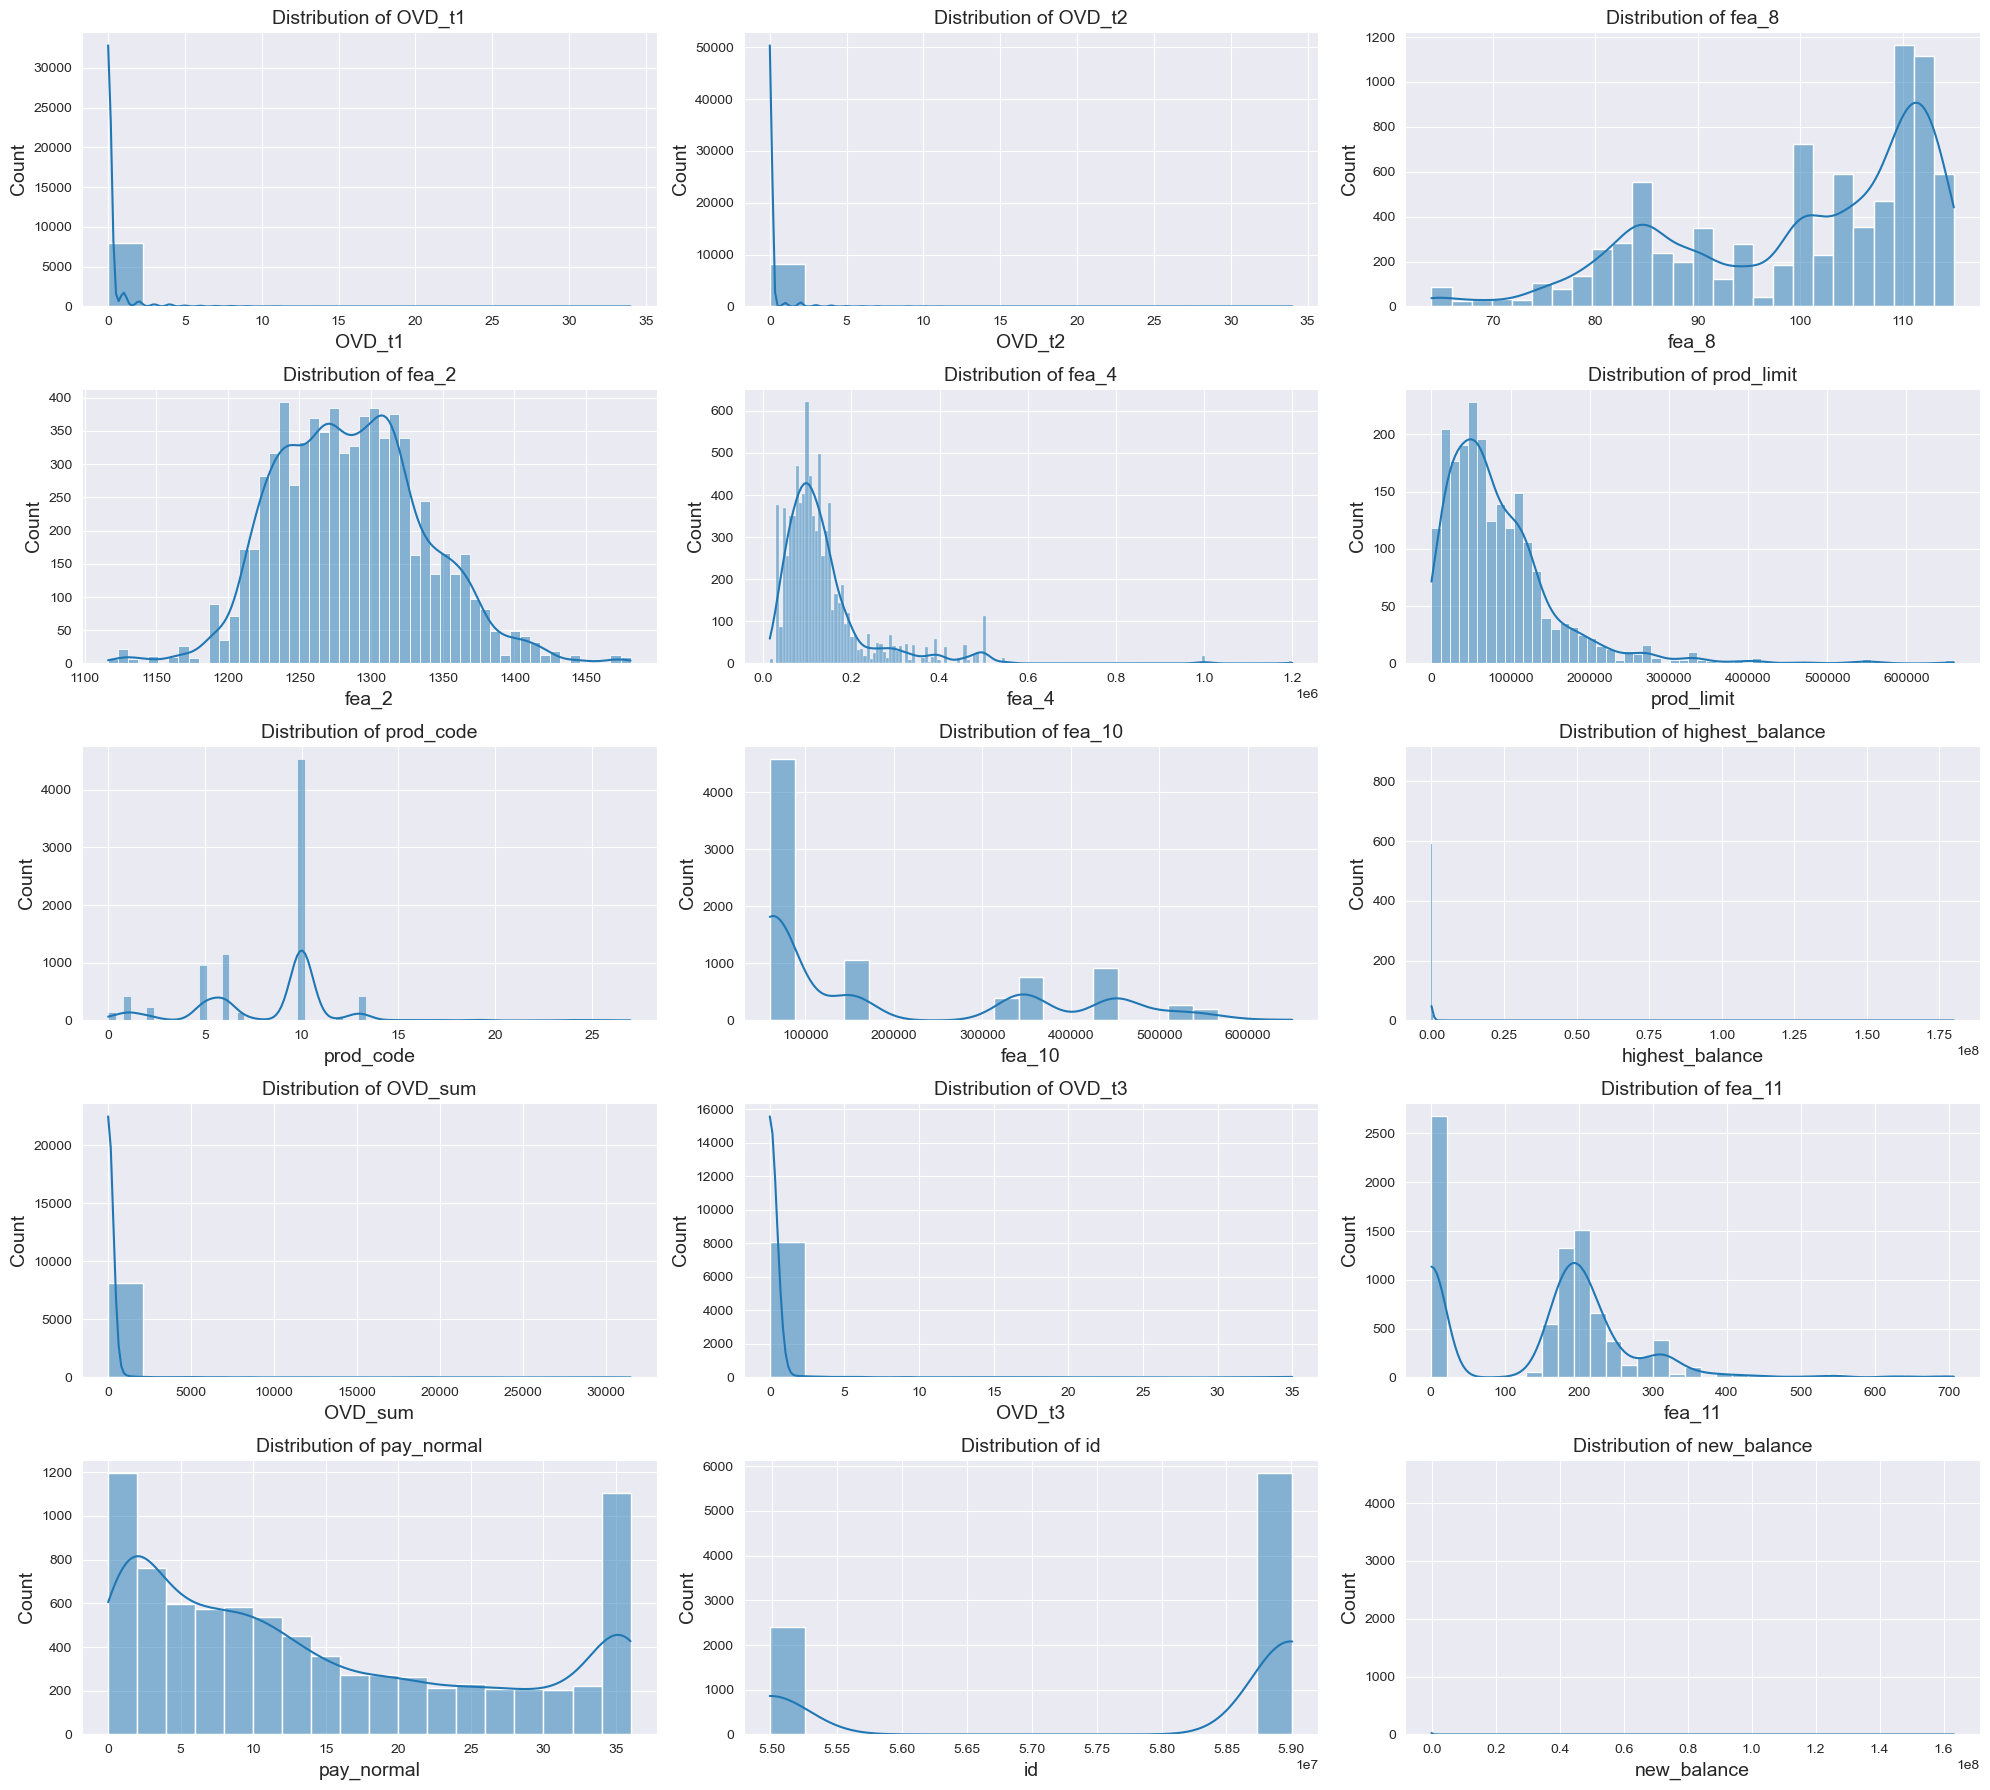

In [31]:
# Visualize distribution of each numeric feature
fig, axes = plt.subplots(nrows= 5, ncols = 3, figsize=(20, 18))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data= df, x = col, kde= True, ax = axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize= 14)
    axes[i].set_xlabel(f"{col}", fontsize=14)
    axes[i].set_ylabel("Count", fontsize=14)

plt.tight_layout()
plt.show()

### Key Findings

1. From Histogram analysis it is found that none of the numeric feature is normally distributed.

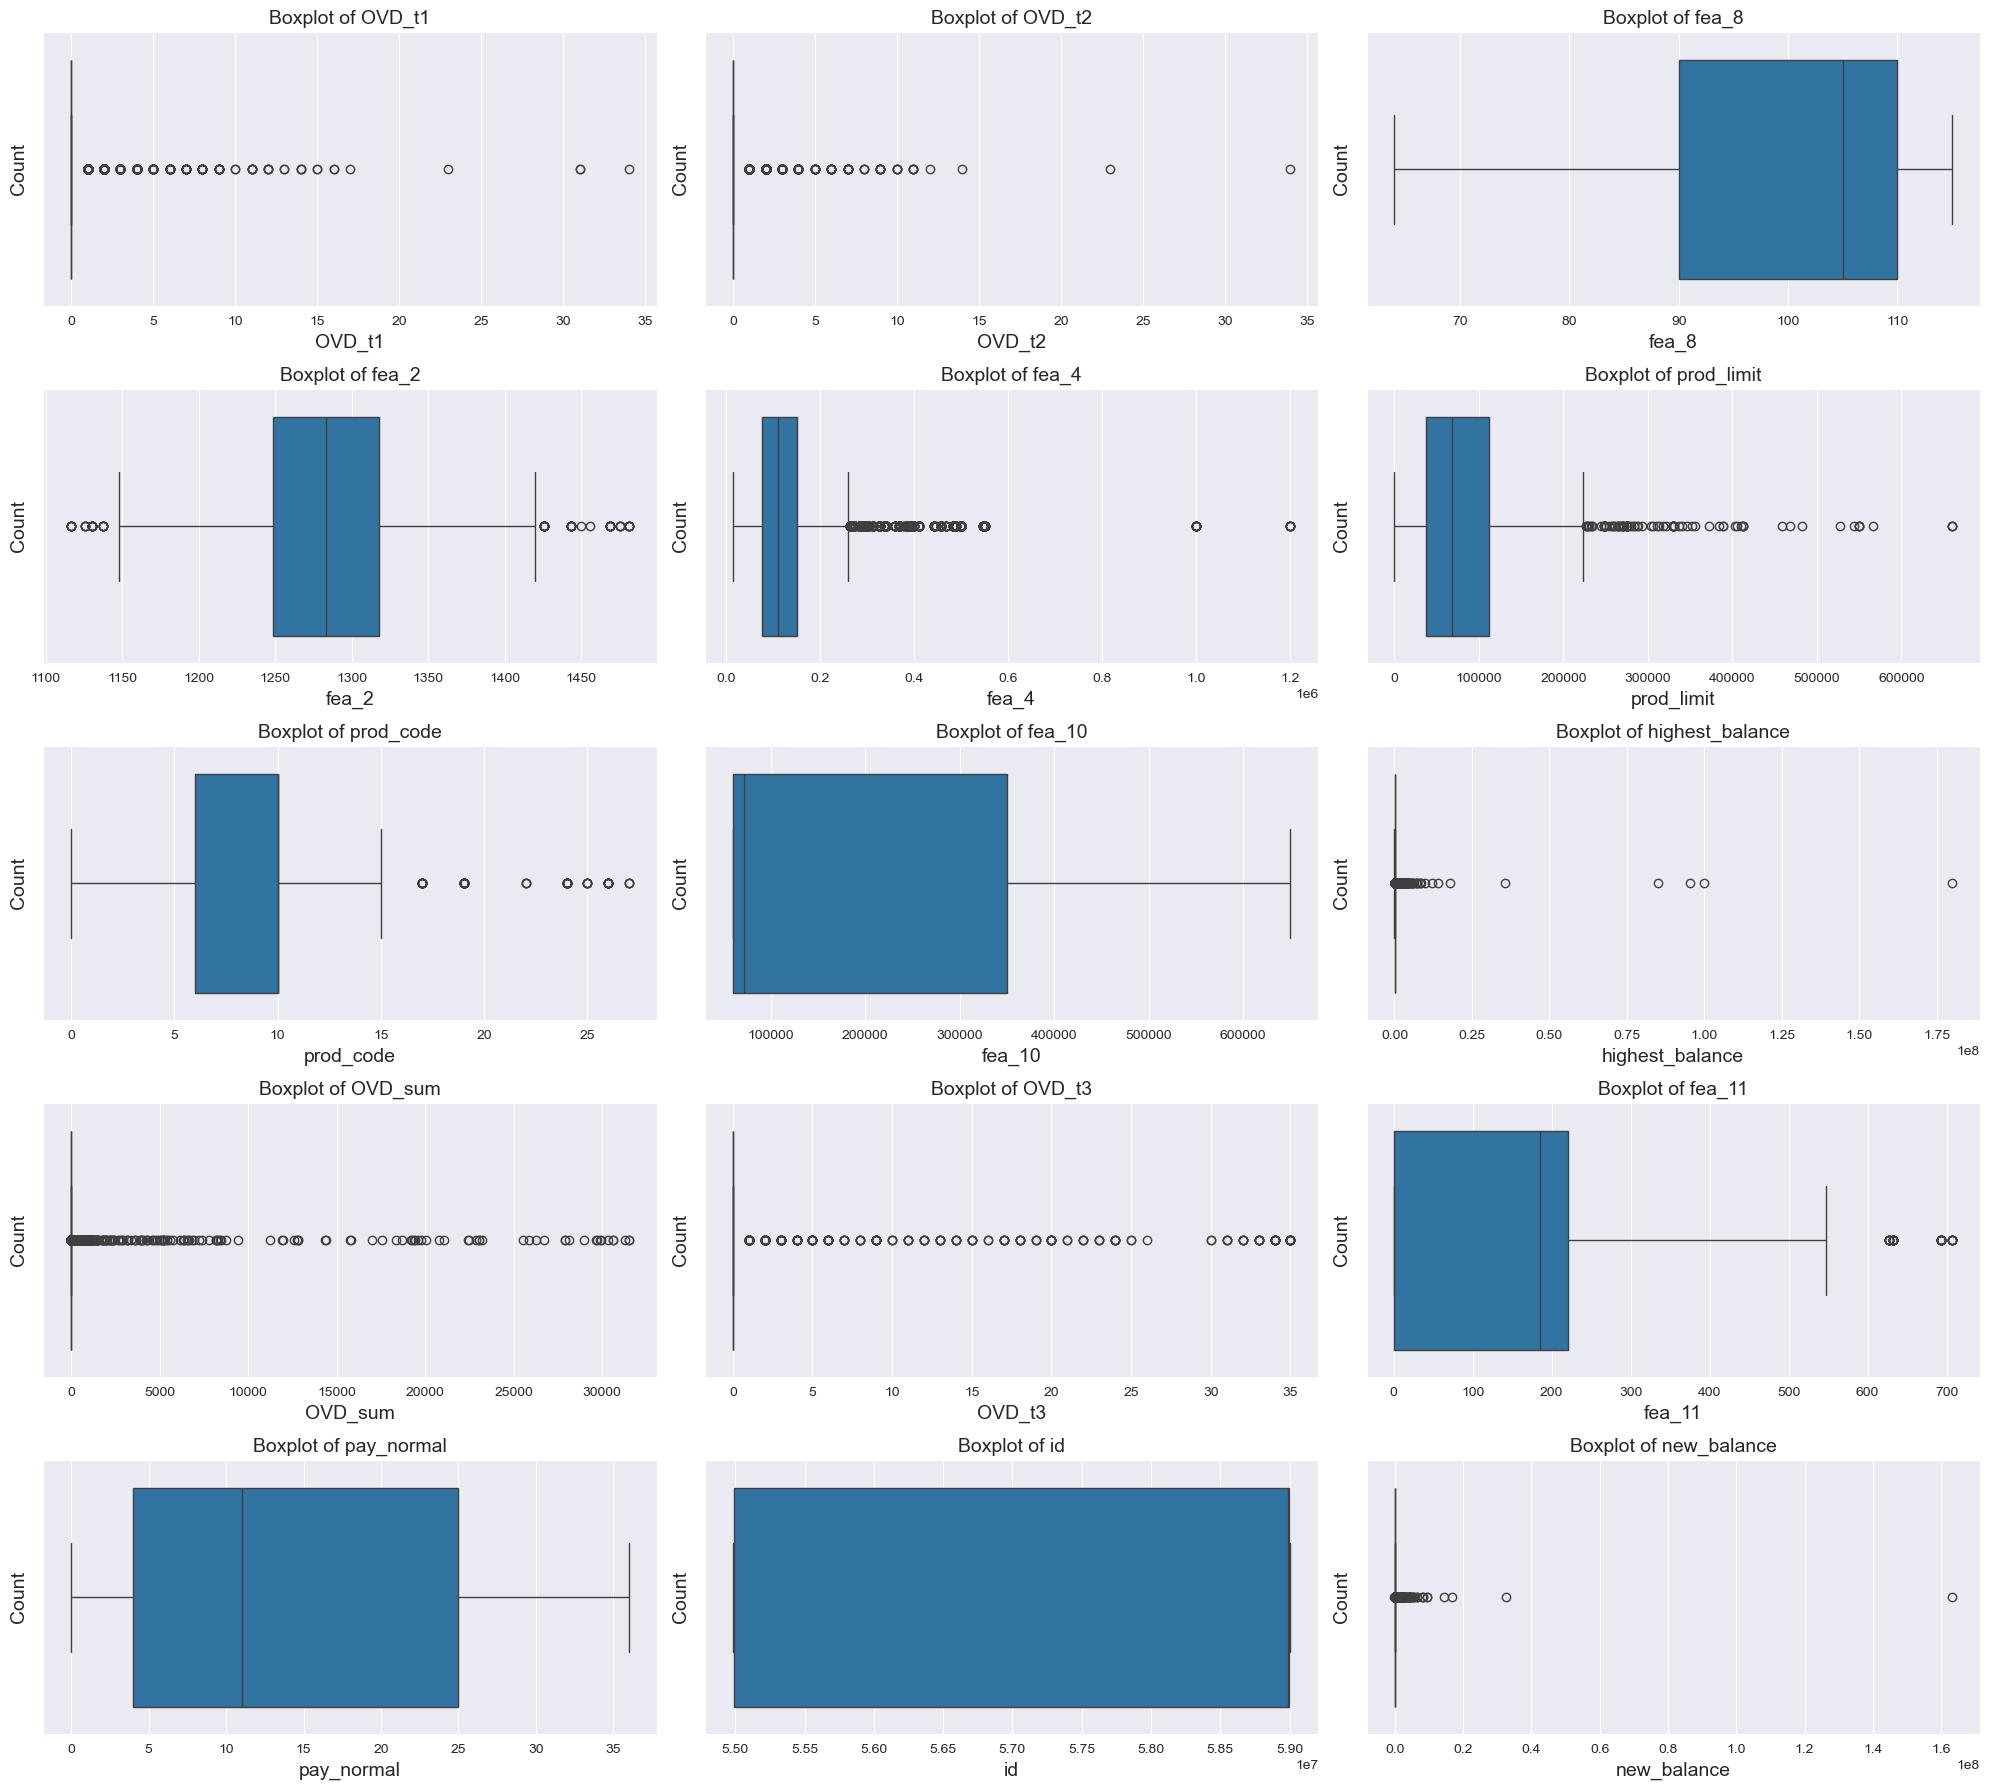

In [32]:
# Outlier Detection in numeric features
# Use Box plot Analysis to detect presence of outliers in numeric features
fig, axes = plt.subplots(nrows= 5, ncols = 3, figsize=(20, 18))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data= df, x = col, ax = axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize= 14)
    axes[i].set_xlabel(f"{col}", fontsize=14)
    axes[i].set_ylabel("Count", fontsize=14)

plt.tight_layout()
plt.show()

### Key Findings

1. From Boxplot analysis it is found that except pay_normal, fea_8 and fea_10 all numerical features contains outliers.

In [38]:
# Count of values for categorical features
print("=" * 60)
print("COUNT OF CATEGORICAL FEATURES")
print("=" * 60)
for col in cat_cols:
    print(f"Feature: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(df[col].value_counts().sort_index())
    print("-" * 60)

COUNT OF CATEGORICAL FEATURES
Feature: fea_1
Number of unique values: 6
fea_1
1      73
2      15
4    2520
5    2054
6       7
7    3581
Name: count, dtype: int64
------------------------------------------------------------
Feature: label
Number of unique values: 2
label
0    6863
1    1387
Name: count, dtype: int64
------------------------------------------------------------
Feature: fea_7
Number of unique values: 10
fea_7
-1     1259
 1       19
 2      110
 3       81
 4      109
 5     4827
 7       68
 8       68
 9     1635
 10      74
Name: count, dtype: int64
------------------------------------------------------------
Feature: fea_6
Number of unique values: 10
fea_6
3       15
4       48
5       25
6        7
8     2491
9       29
11    3515
12      66
15    2049
16       5
Name: count, dtype: int64
------------------------------------------------------------
Feature: fea_5
Number of unique values: 2
fea_5
1     488
2    7762
Name: count, dtype: int64
------------------------

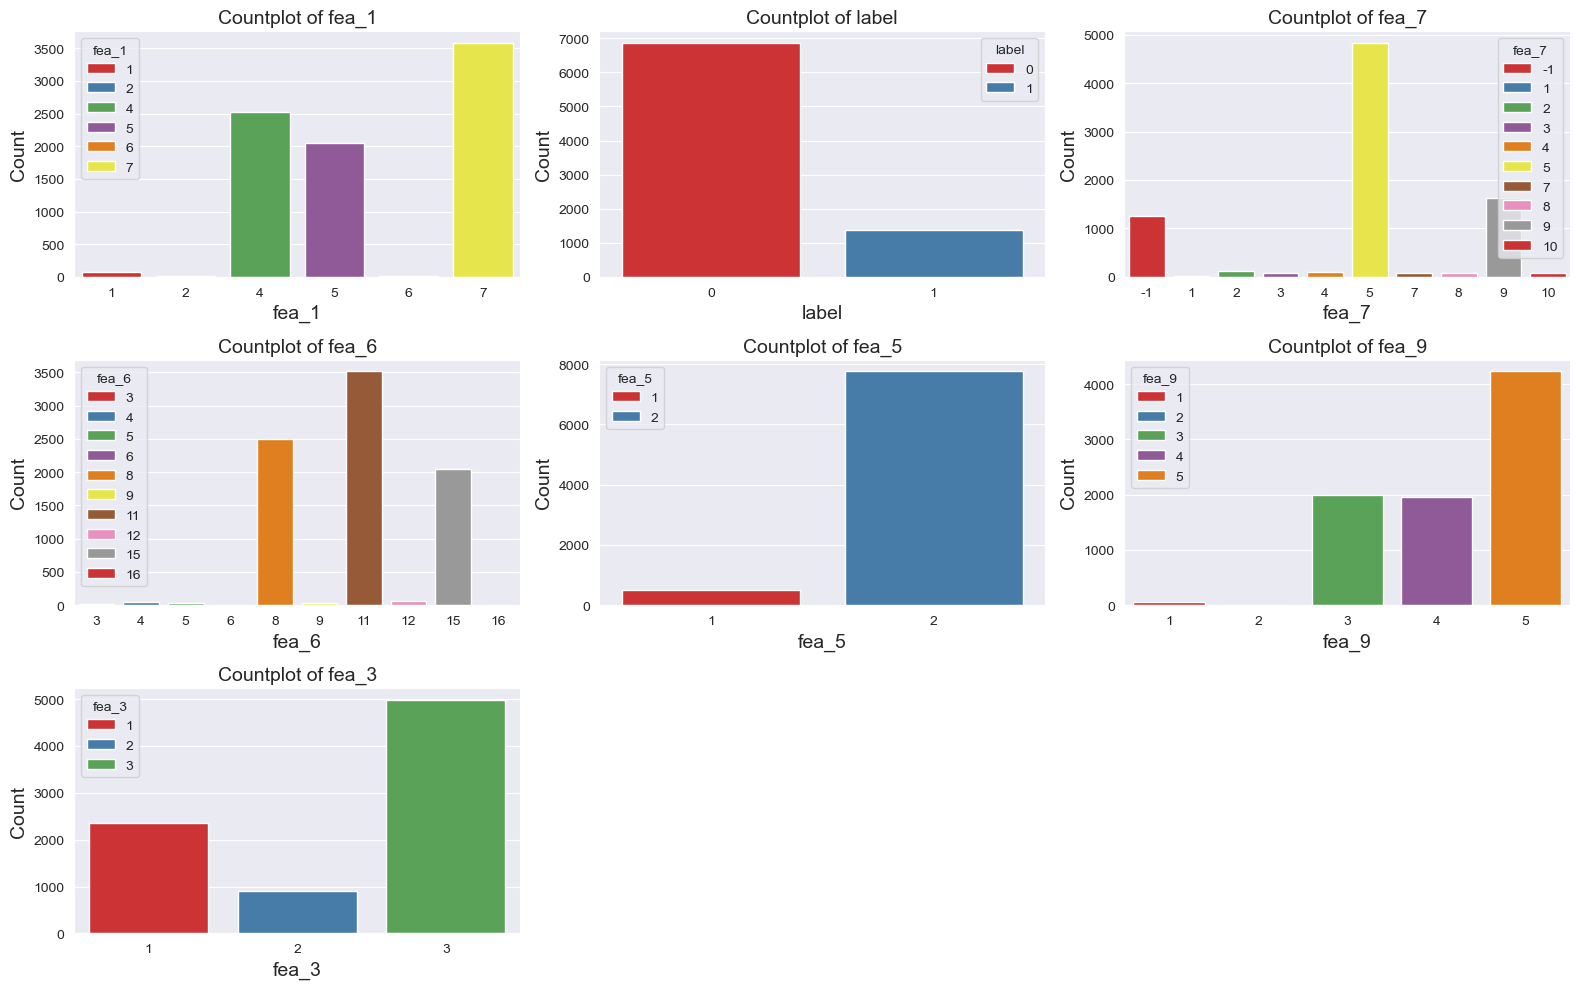

In [39]:
# Visualize categorical features with count plots
fig, axes = plt.subplots(nrows= 3, ncols = 3, figsize=(16, 10))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data= df, x = col, hue=col, palette="Set1", ax = axes[i])
    axes[i].set_title(f"Countplot of {col}", fontsize= 14)
    axes[i].set_xlabel(f"{col}", fontsize=14)
    axes[i].set_ylabel("Count", fontsize=14)

plt.tight_layout()
axes[-2].axis("off")
axes[-1].axis("off")
plt.show()

### Key Findings

From Count Plot analysis of **label** it is found that number of non risky observations very high as compaired to risky observations. So this data set is **imbalanced** dataset.

### Correlation Analysis

In [40]:
# Find linear correlation using Pearson's correlation coefficient
corr_cols = num_cols + cat_cols
corr = df[corr_cols].corr().round(2)
corr

OVD_t1  OVD_t2  fea_8  fea_2  fea_4  prod_limit  prod_code  \
OVD_t1             1.00    0.32   0.00  -0.01   0.03       -0.02      -0.00   
OVD_t2             0.32    1.00  -0.00   0.03   0.01       -0.09       0.00   
fea_8              0.00   -0.00   1.00   0.02  -0.08       -0.02      -0.03   
fea_2             -0.01    0.03   0.02   1.00   0.26        0.10      -0.07   
fea_4              0.03    0.01  -0.08   0.26   1.00        0.30       0.04   
prod_limit        -0.02   -0.09  -0.02   0.10   0.30        1.00       0.06   
prod_code         -0.00    0.00  -0.03  -0.07   0.04        0.06       1.00   
fea_10             0.01    0.01   0.13  -0.08   0.07        0.04       0.01   
highest_balance    0.02   -0.00  -0.03   0.01  -0.00        0.54      -0.01   
OVD_sum            0.07    0.10   0.02   0.01   0.01       -0.05       0.02   
OVD_t3             0.09    0.17   0.04   0.02   0.00       -0.06       0.02   
fea_11             0.03    0.05   0.17   0.08   0.06        0.04      -0.04   
pay_normal         0.04   -0.01  -0.01   0.05   0.07        0.07       0.09   
id                -0.01   -0.00   0.03   0.04  -0.02        0.02       0.02   
new_balance       -0.00   -0.01  -0.01   0.01  -0.01        0.36      -0.08   
fea_1              0.03    0.02   0.09  -0.00  -0.14       -0.07      -0.03   
label              0.05    0.06  -0.02  -0.06  -0.15       -0.05      -0.02   
fea_7              0.00    0.03   0.13   0.01  -0.07       -0.03       0.00   
fea_6              0.01   -0.00   0.09  -0.02  -0.19       -0.05      -0.01   
fea_5              0.01    0.01   0.00   0.01   0.05        0.01       0.00   
fea_9              0.01    0.02  -0.07   0.13   0.11        0.05       0.01   
fea_3              0.03   -0.01   0.05  -0.23  -0.09       -0.04       0.02   

                 fea_10  highest_balance  OVD_sum  ...  pay_normal    id  \
OVD_t1             0.01             0.02     0.07  ...        0.04 -0.01   
OVD_t2             0.01            -0.00     0.10  ...       -0.01 -0.00   
fea_8              0.13            -0.03     0.02  ...       -0.01  0.03   
fea_2             -0.08             0.01     0.01  ...        0.05  0.04   
fea_4              0.07            -0.00     0.01  ...        0.07 -0.02   
prod_limit         0.04             0.54    -0.05  ...        0.07  0.02   
prod_code          0.01            -0.01     0.02  ...        0.09  0.02   
fea_10             1.00             0.02     0.04  ...        0.00  0.08   
highest_balance    0.02             1.00    -0.01  ...       -0.00  0.02   
OVD_sum            0.04            -0.01     1.00  ...       -0.09 -0.01   
OVD_t3             0.05            -0.01     0.90  ...       -0.10 -0.01   
fea_11             0.28             0.03     0.03  ...       -0.01  0.07   
pay_normal         0.00            -0.00    -0.09  ...        1.00  0.01   
id                 0.08             0.02    -0.01  ...        0.01  1.00   
new_balance        0.01             0.75    -0.01  ...        0.00  0.01   
fea_1              0.08             0.02     0.02  ...       -0.03 -0.08   
label             -0.02             0.06     0.05  ...       -0.06 -0.01   
fea_7             -0.24            -0.05     0.02  ...        0.02 -0.02   
fea_6              0.21            -0.00     0.03  ...       -0.00 -0.01   
fea_5              0.12             0.01     0.01  ...        0.01 -0.05   
fea_9             -0.03             0.03    -0.00  ...        0.04  0.00   
fea_3             -0.16             0.01     0.02  ...        0.01 -0.03   

                 new_balance  fea_1  label  fea_7  fea_6  fea_5  fea_9  fea_3  
OVD_t1                 -0.00   0.03   0.05   0.00   0.01   0.01   0.01   0.03  
OVD_t2                 -0.01   0.02   0.06   0.03  -0.00   0.01   0.02  -0.01  
fea_8                  -0.01   0.09  -0.02   0.13   0.09   0.00  -0.07   0.05  
fea_2                   0.01  -0.00  -0.06   0.01  -0.02   0.01   0.13  -0.23  
fea_4                  -0.01  -0.14  -0.15  -0.07 

<Axes: >

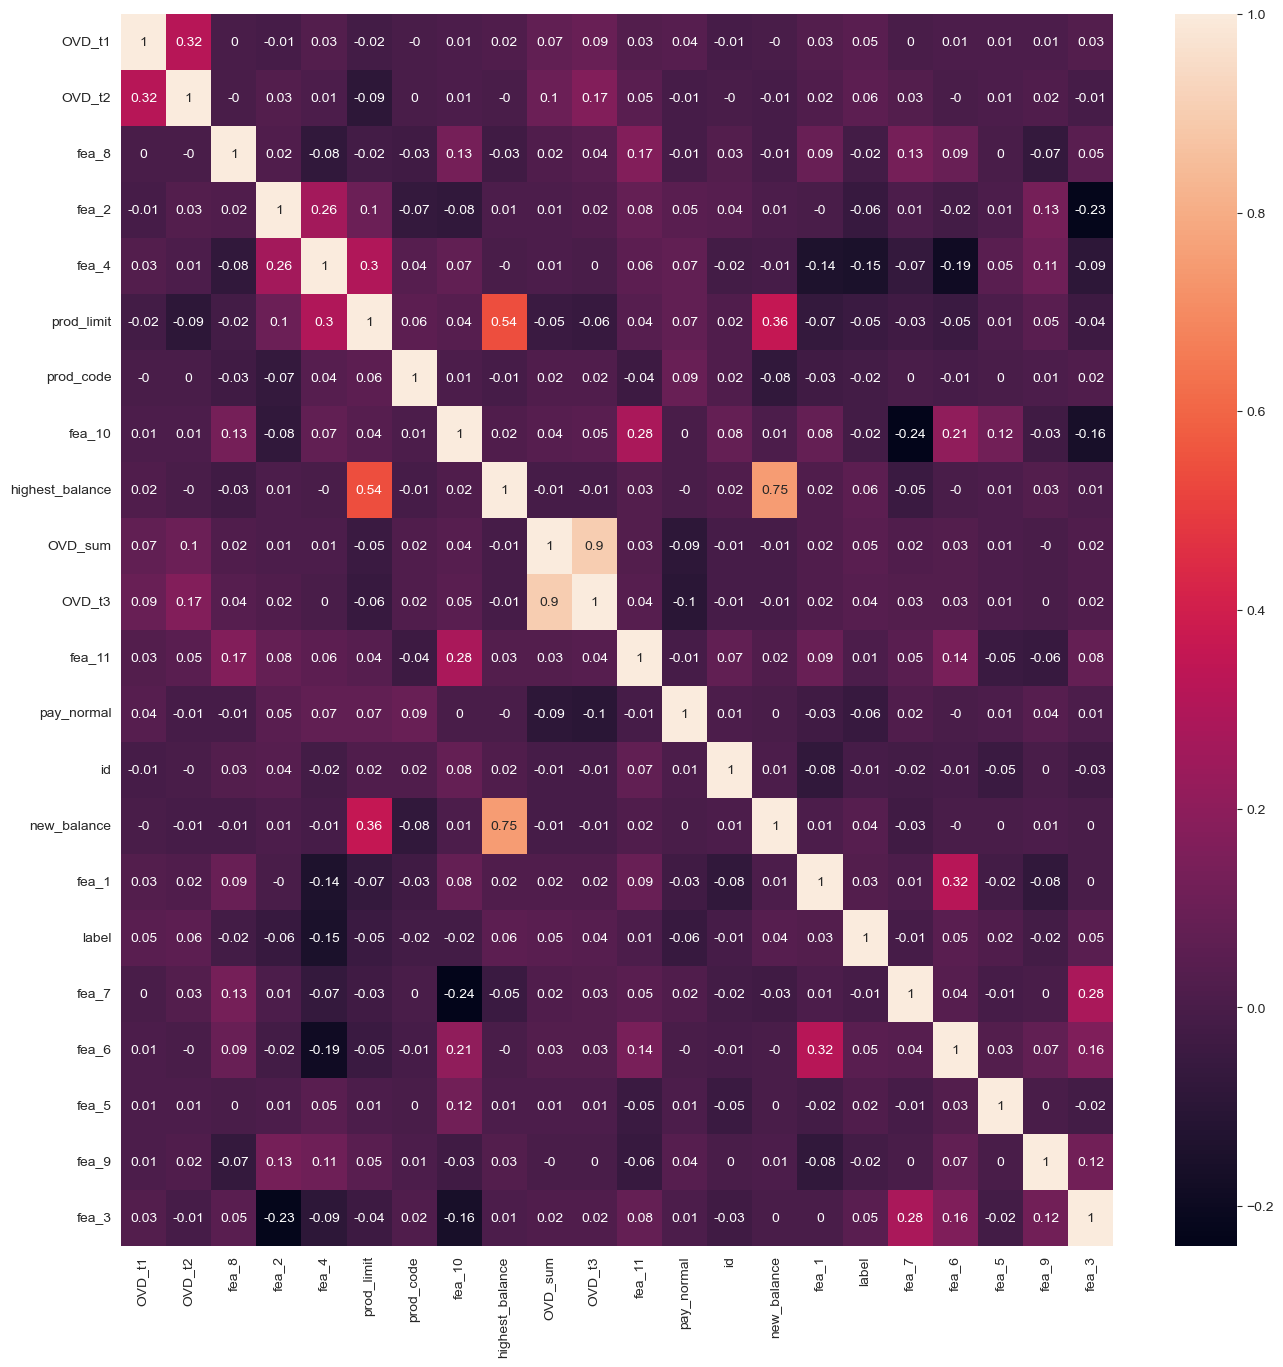

In [41]:
# Visualize with heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot= True)

In [45]:
# Find Predictive Power score for features for non-linear correlation
pps_matrix = pps.matrix(df[corr_cols])
pps_matrix[(pps_matrix["x"] != pps_matrix["y"]) & (pps_matrix["ppscore"] > 0.5)]

x        y   ppscore        case  is_valid_score  \
208  OVD_sum   OVD_t3  0.634788  regression            True   
229   OVD_t3  OVD_sum  0.507121  regression            True   
288       id    fea_8  0.872663  regression            True   
289       id    fea_2  0.885105  regression            True   
290       id    fea_4  0.904447  regression            True   
293       id   fea_10  0.898269  regression            True   
297       id   fea_11  0.886682  regression            True   
301       id    fea_1  0.995686  regression            True   
302       id    label  0.848798  regression            True   
303       id    fea_7  0.838815  regression            True   
304       id    fea_6  0.993869  regression            True   
305       id    fea_5  0.812485  regression            True   
306       id    fea_9  0.900938  regression            True   
307       id    fea_3  0.879285  regression            True   
348    fea_1    fea_6  0.987070  regression            True   
411    fea_6    fea_1  1.000000  regression            True   

                  metric  baseline_score   model_score  \
208  mean absolute error        0.366600      0.133887   
229  mean absolute error      192.200200     94.731531   
288  mean absolute error       10.385000      1.322398   
289  mean absolute error       41.429100      4.759982   
290  mean absolute error    63921.000000   6107.832620   
293  mean absolute error   124539.923000  12669.630225   
297  mean absolute error       93.142818     10.554720   
301  mean absolute error        1.205400      0.005200   
302  mean absolute error        0.171400      0.025916   
303  mean absolute error        1.858400      0.299545   
304  mean absolute error        2.005800      0.012298   
305  mean absolute error        0.055800      0.010463   
306  mean absolute error        0.755800      0.074871   
307  mean absolute error        0.680600      0.082158   
348  mean absolute error        2.005800      0.025935   
411  mean absolute error        1.205400      0.000000   

                       model  
208  DecisionTreeRegressor()  
229  DecisionTreeRegressor()  
288  DecisionTreeRegressor()  
289  DecisionTreeRegressor()  
290  DecisionTreeRegressor()  
293  DecisionTreeRegressor()  
297  DecisionTreeRegressor()  
301  DecisionTreeRegressor()  
302  DecisionTreeRegressor()  
303  DecisionTreeRegressor()  
304  DecisionTreeRegressor()  
305  DecisionTreeRegressor()  
306  DecisionTreeRegressor()  
307  DecisionTreeRegressor()  
348  DecisionTreeRegressor()  
411  DecisionTreeRegressor()

### Key Findings

- From Pearson's correlation analysis it is found that none of the input feature has  strong or moderate linear correlation with output feature(label).
- From Pearson's correlation analysis it is found that OVD_sum and OVD_t3 as strong positive correlation.
- From Pearson's correlation analysis it is found that new_balance and highest_balance as strong positive correlation.
- From Pearson's correlation analysis it is found that prod_limit and highest_balance as moderate positive correlation.
- From Predictive powaer score it is found that fea_1 and fea_6 has strong non-linear correlation.

### Data Cleaning

In [47]:
# Convert Date features from object type to date
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce", format="%d/%m/%Y")

In [49]:
# Sanity check
df.dtypes

id                          int64
OVD_t1                      int64
OVD_t2                      int64
OVD_t3                      int64
OVD_sum                     int64
pay_normal                  int64
prod_code                   int64
prod_limit                float64
update_date        datetime64[ns]
new_balance               float64
highest_balance           float64
report_date        datetime64[ns]
label                       int64
fea_1                       int64
fea_2                     float64
fea_3                       int64
fea_4                     float64
fea_5                       int64
fea_6                       int64
fea_7                       int64
fea_8                       int64
fea_9                       int64
fea_10                      int64
fea_11                    float64
dtype: object